# 문제 1
- 줄세우기
- https://www.acmicpc.net/problem/2631

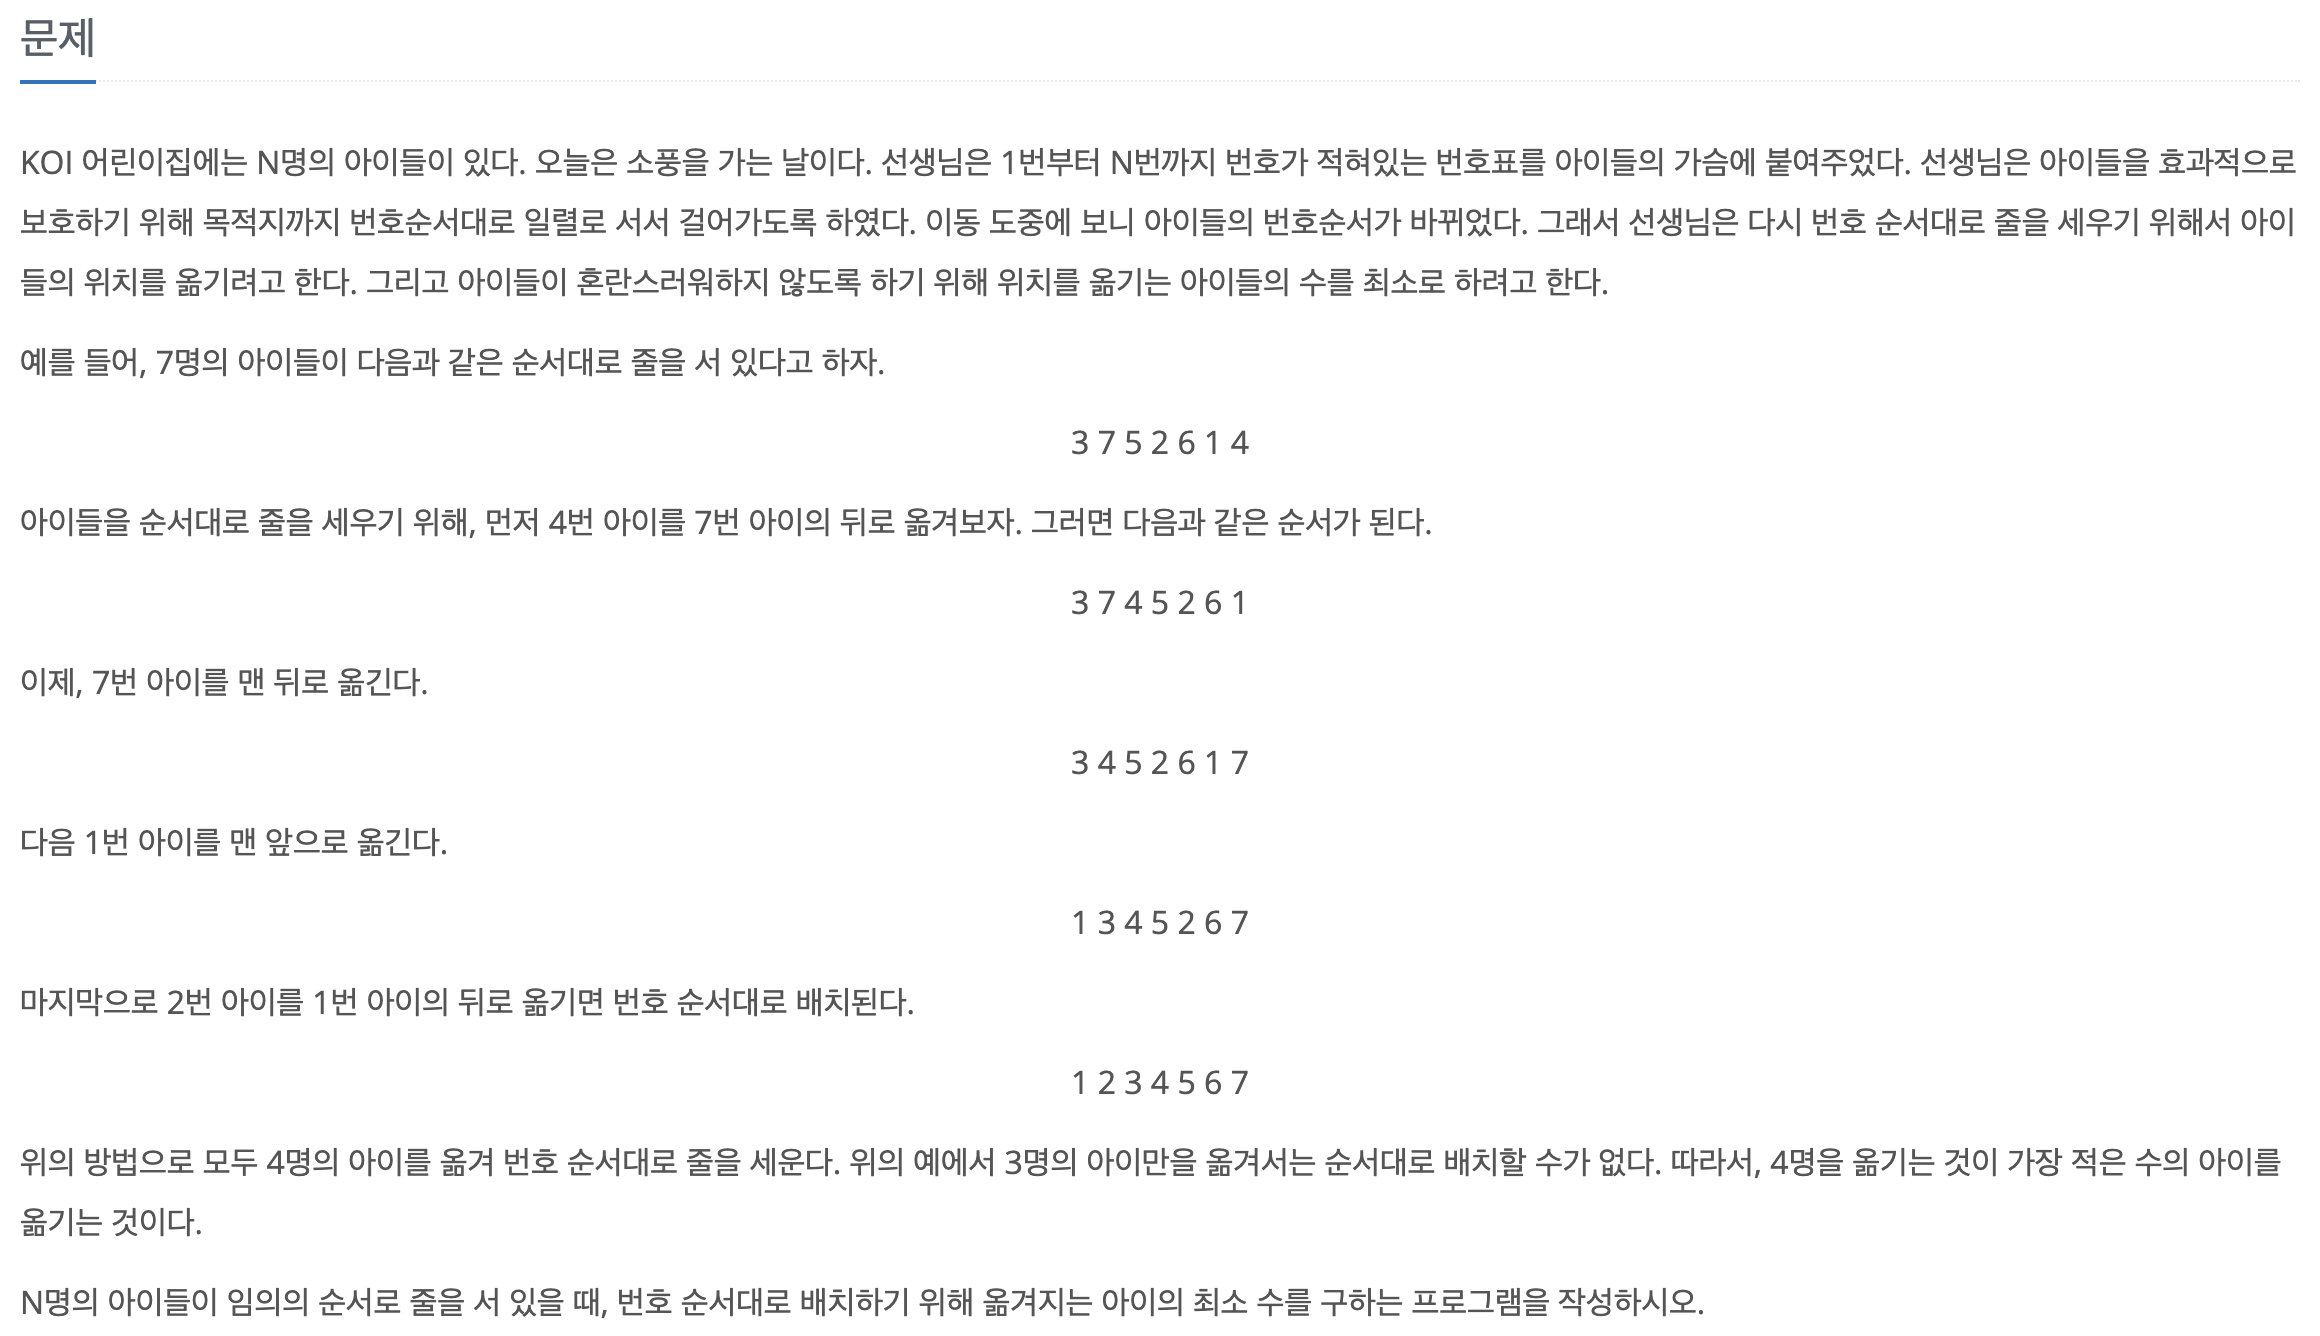
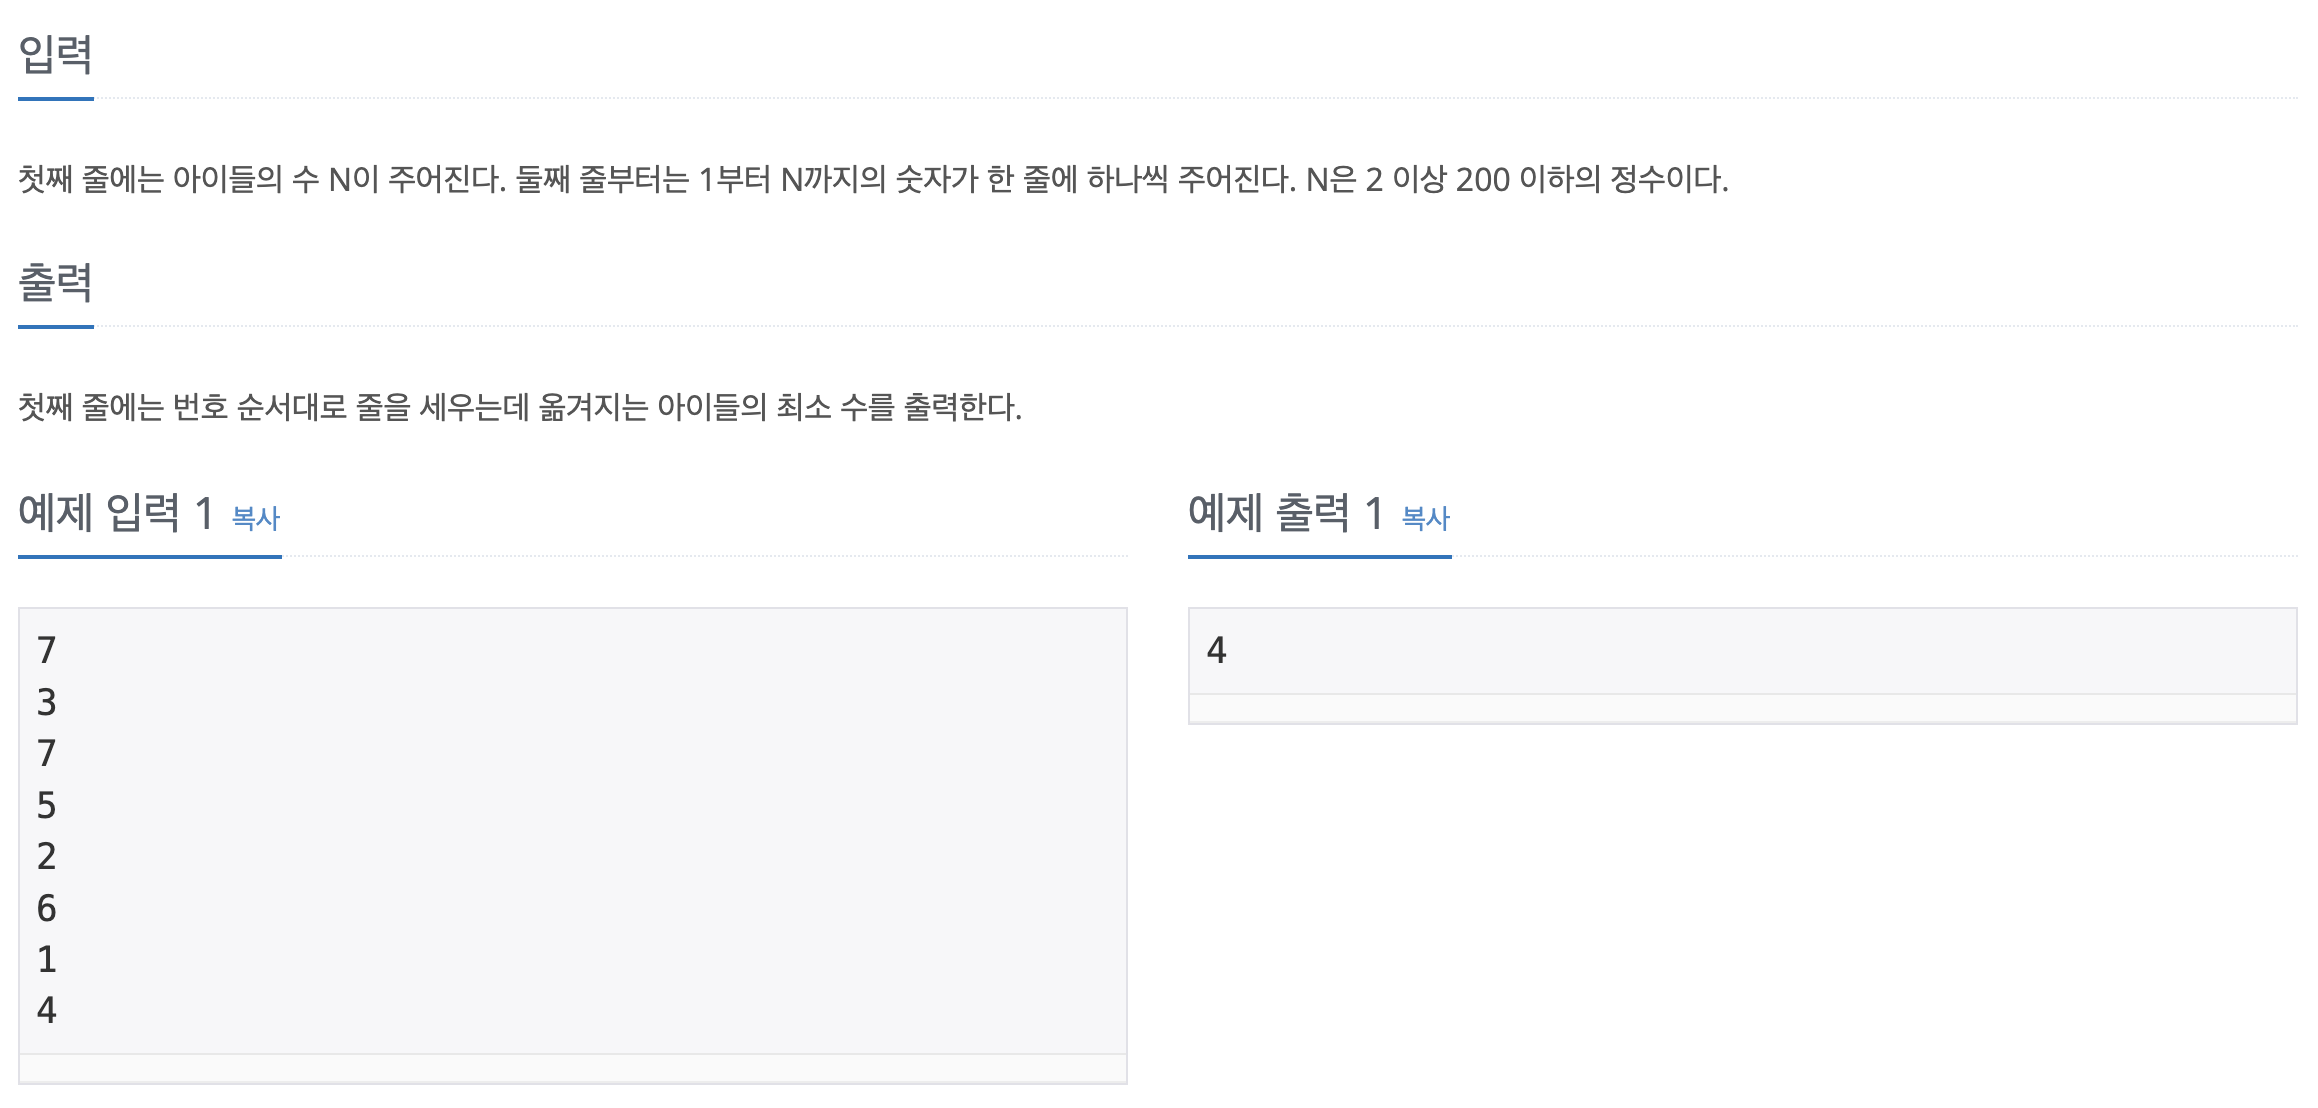

## Step
- 결국은 연속된 수열을 만들어내야 한다
- 그렇다면 바꿔야할 숫자 = 연속하지 않는 숫자들
    - ex) 3 7 5 2 6 1 4에서, ```7,2,1,4```는 연속되는 수열을 방해하는 숫자들
    - ```3,5,6``` 은 연속된 수열 (사이사이에 적절한 숫자 배치만 한다면)
    
    
- 가장 긴 연속된 수열을 찾고, 전체 길이에서 빼준다


In [24]:
import sys
# input = sys.stdin.readline

n = int(input())
num = []
for _ in range(n):
    num.append(int(input()))

dp = [1] * n
for i,each in enumerate(num):
    if i != 0:
        for j in range(i):
            if num[j] < each:
                dp[i] = max(dp[i],dp[j]+1)

print(n - max(dp))

4


In [23]:
dp

[1, 2, 2, 1, 3, 1, 2]

# 문제 2
- 타일 채우기
- https://www.acmicpc.net/problem/2133

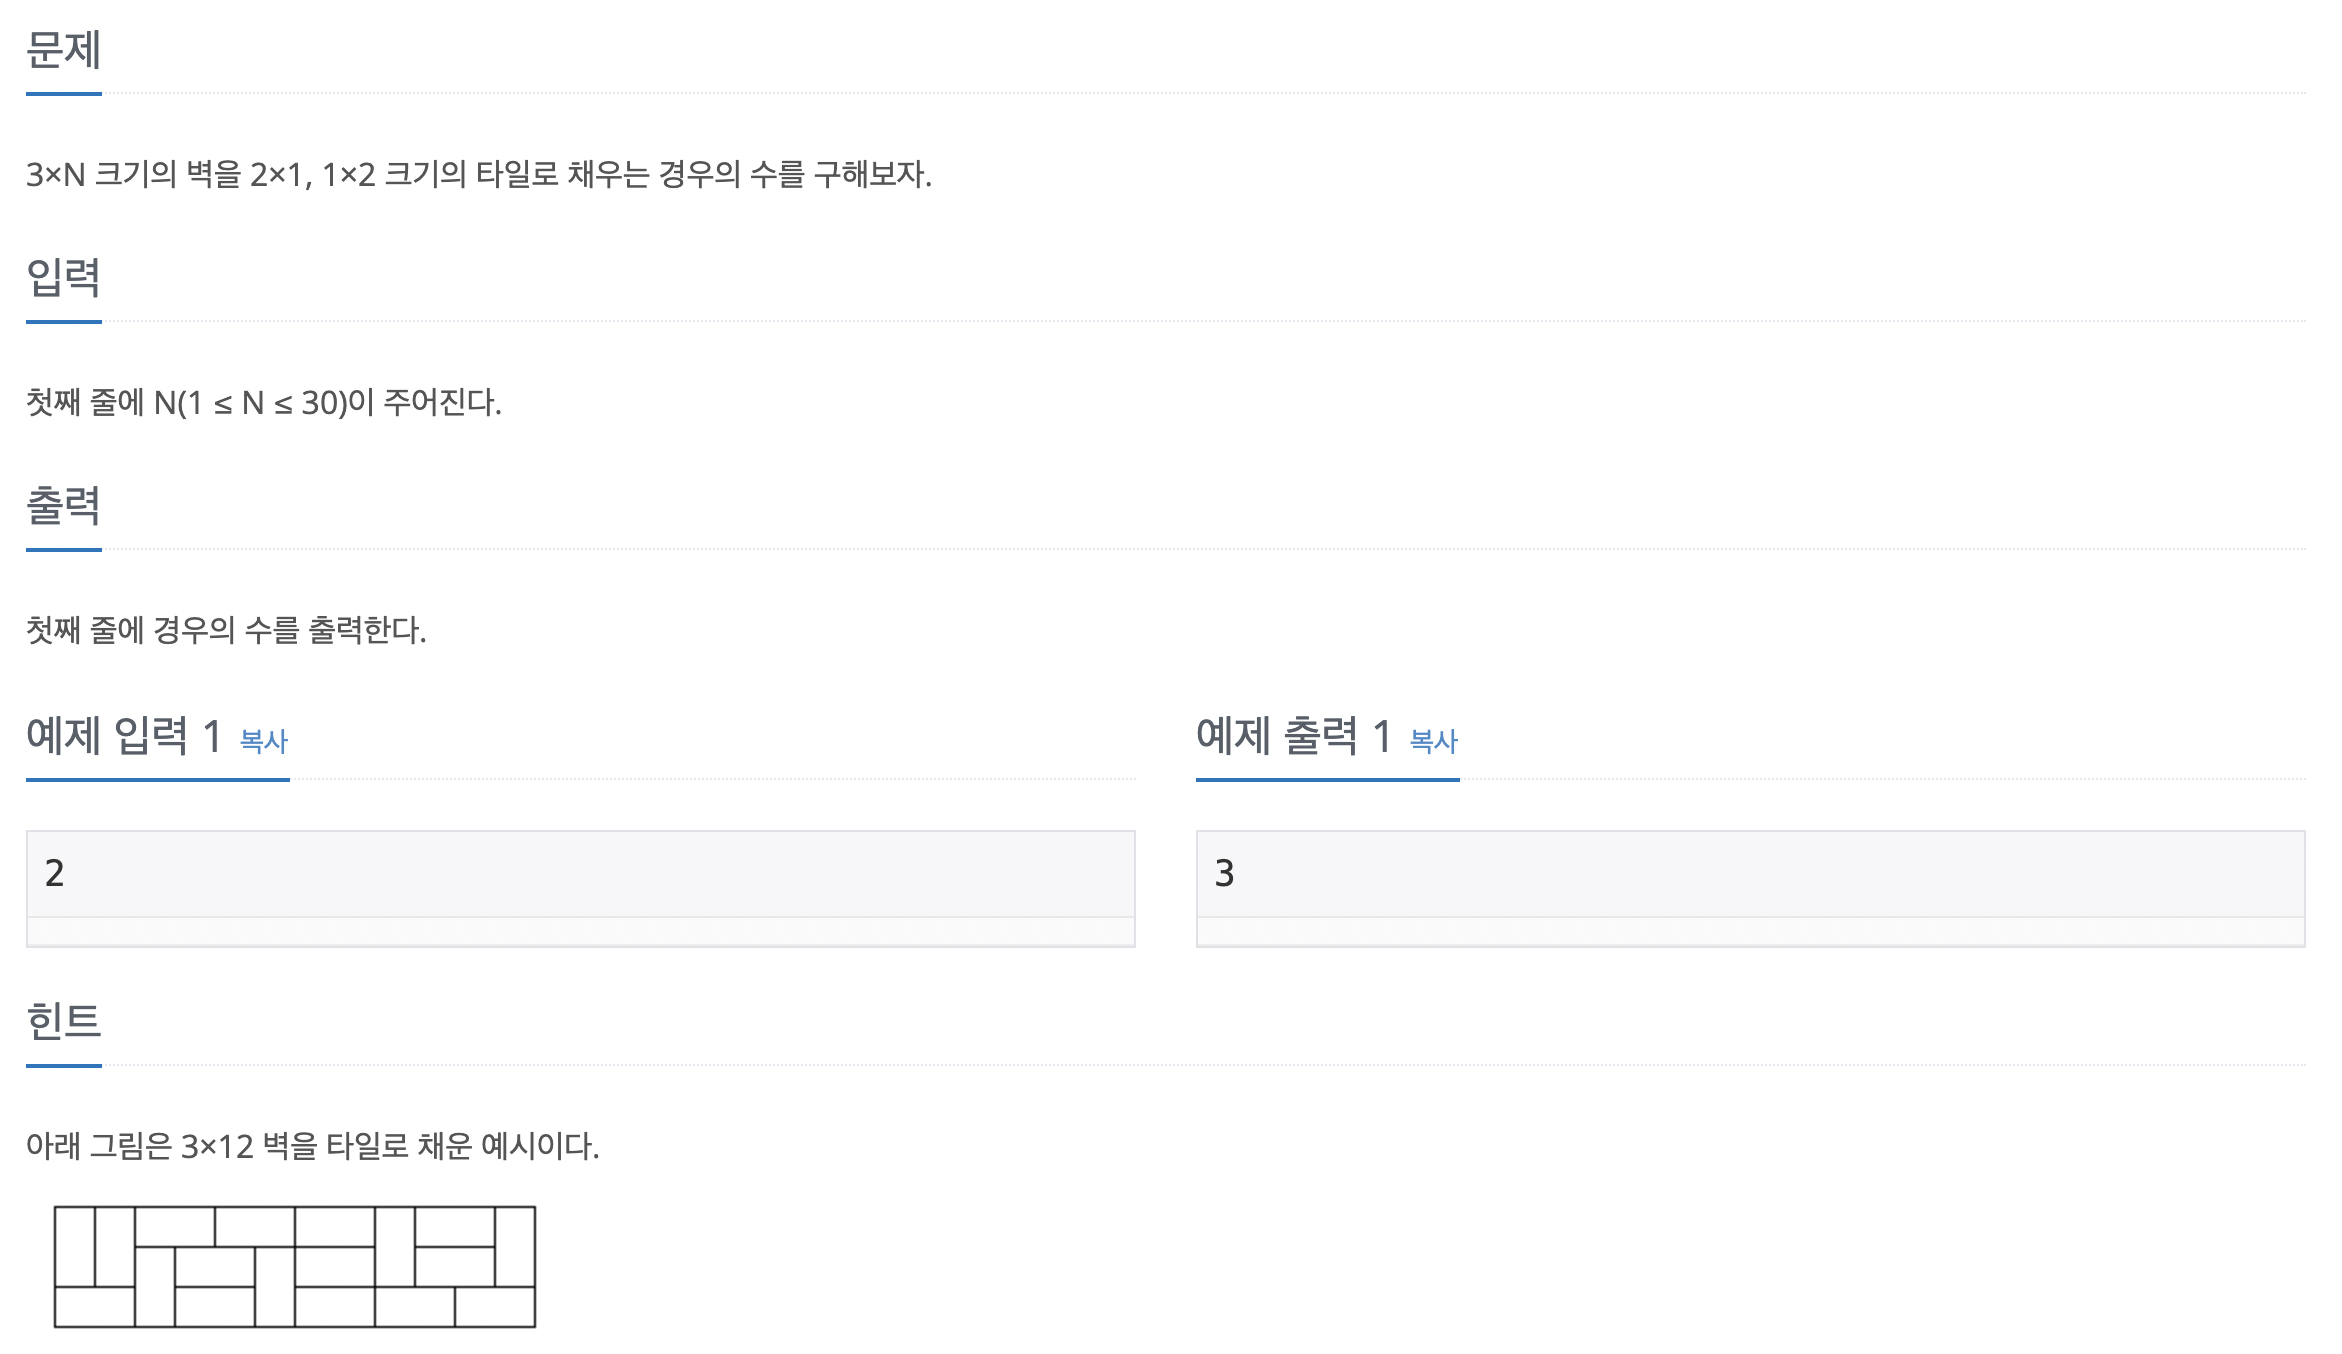

## Step
- 그림 그리며 점화식 확인
- n칸 채우는 경우의 수 = n-2칸채우는 경우의 수 * 3(2칸짜리 채우는 경우의 수) + n-4칸 채우는 경우의 수 * 2(4칸짜리 채우는 경우의 수) ...


- 참고 코드
- https://ahn3330.tistory.com/81

In [29]:
n = int(input())
dp = [1] * (n+1)
dp[1] = 3
for i in range(1,n+1):
    if i%2 == 1:
        dp[i] = 0
    else:
        dp[i] = dp[i-2] * 3
        for j in range(0,i-2,2):
            dp[i] += dp[j]*2

print(dp[n])

8
153


In [28]:
dp

[1, 0, 3, 0, 11, 0, 41, 0, 153, 0, 571]

# 문제 3
- 암호코드
- https://www.acmicpc.net/problem/2011

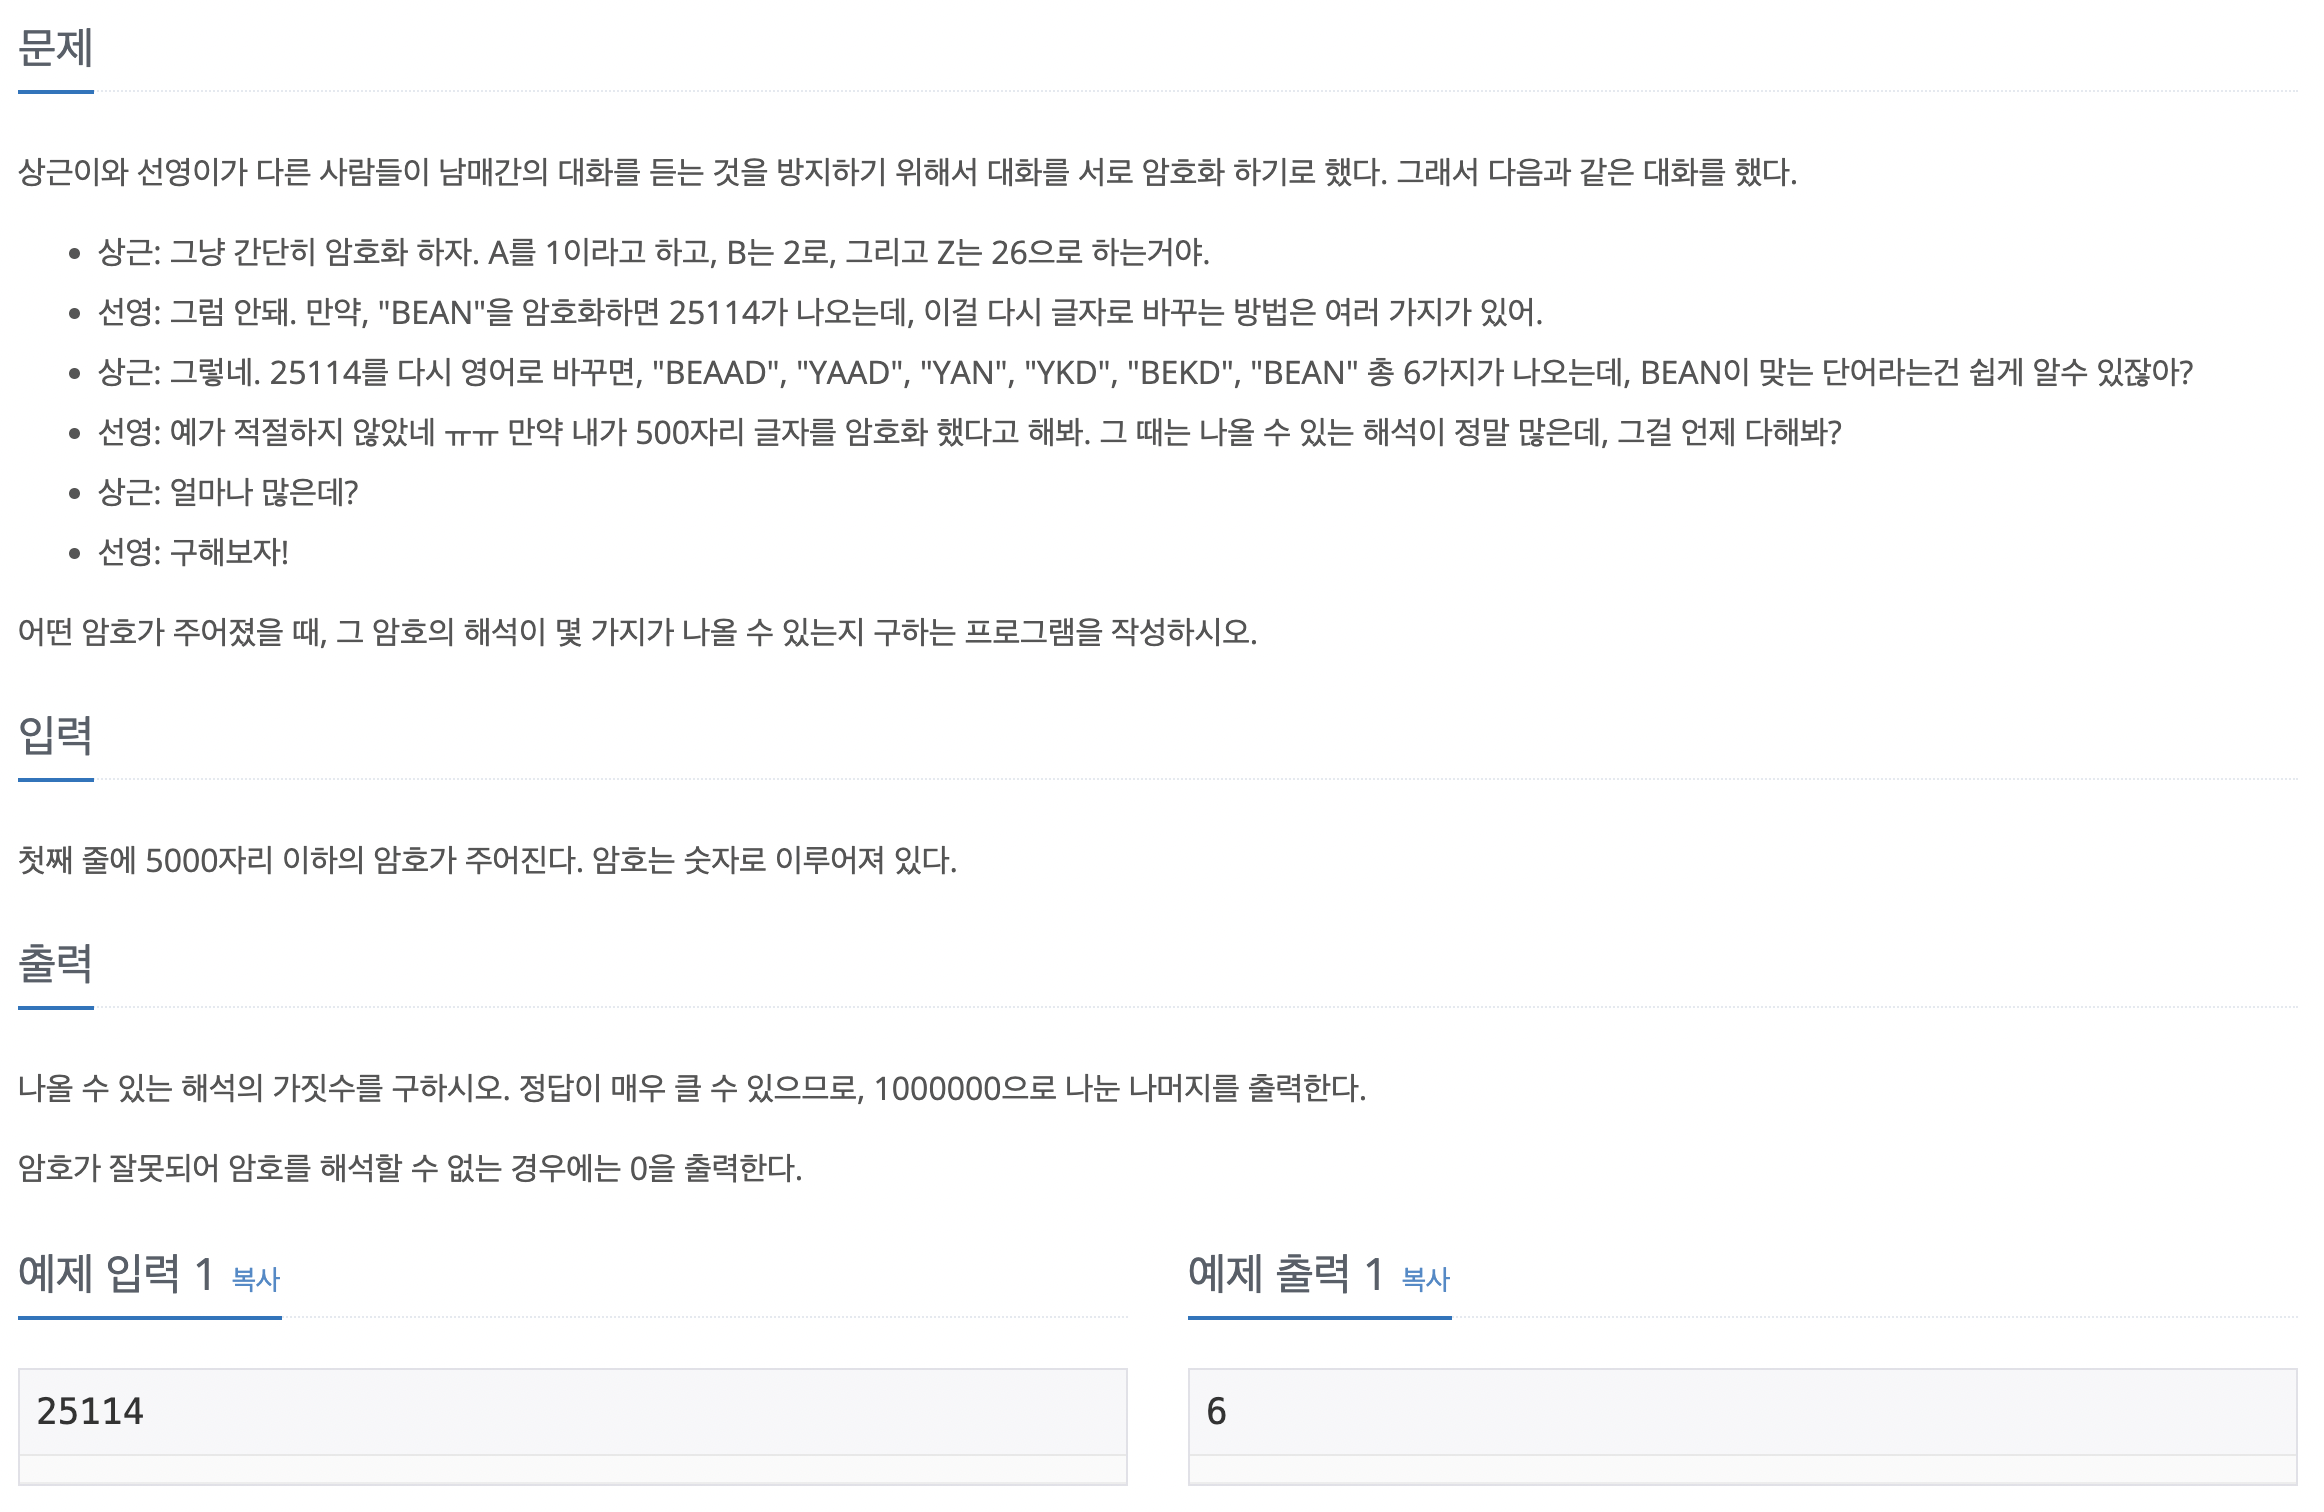
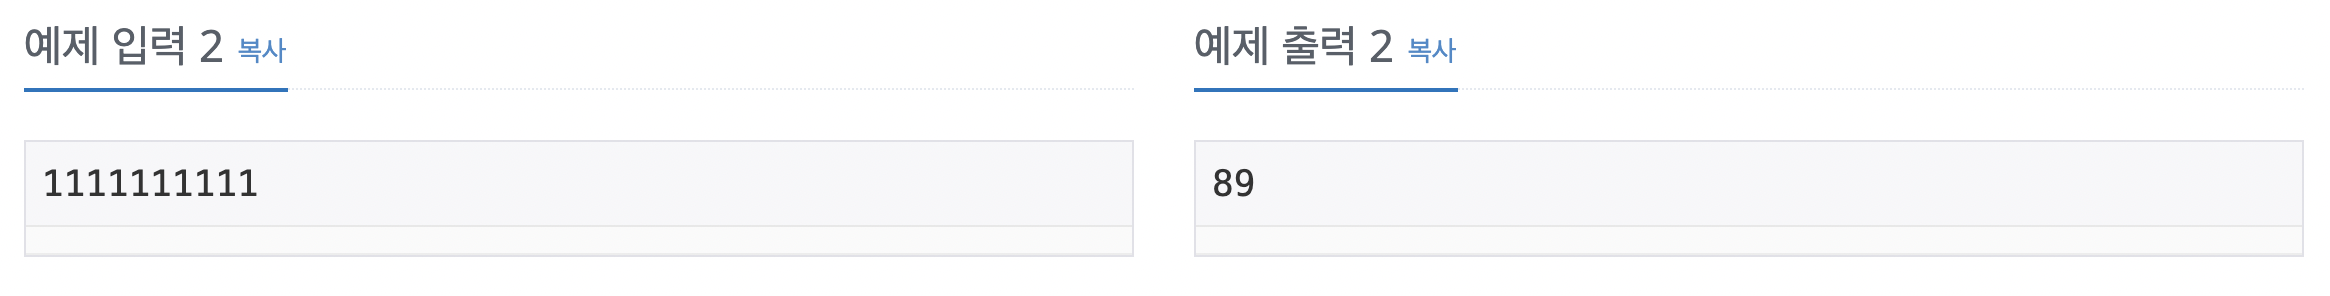

## Step
- 알파벳은 26개까지 존재, 숫자가 26까지 하나로 표현할 수 있음
- i번째 숫자 i-1번째 숫자를 엮었을 때, 
    - 26이하면 dp[i] = dp[i-1] + dp[i-2]
    - 26초과면 dp[i] = dp[i-1]
    
    #### 반례 1
    - 만약 10혹은 20이면, i-2번째 숫자 뒤에 붙이기만 해야하므로 dp[i] = dp[i-2]
    - 만약 30,40과 같이 코드화 할 수 없다면, 0처리하고 break
    
    #### 반례2 : 102
    - 10,2로 나뉘어 1개가 정답, 내 코드에서는 2로 출력
    - 초반 dp설정 부분 고쳤음
    
    #### 반례3 : 30,40  등 두 자리 수이면서 0으로 끝나는 숫자
    - 일반화 하자면, 30과 40이 나오면 코드로 변환할 수 없기에 0처리 하는게 맞다
    - 그렇기 때문에 위와 같은 숫자 등장시 flag 변수를 이용해서 False로 변경
    
    
### 정답처리는 됐지만, 가독성이 영 별로,, 다음에 다시 보면 이해가 안갈듯하다

In [94]:
code = input()
flag = True  # 코드 변환 가능 여부 체크 변수
if int(code) <= 0 or code[0] == '0':
    print(0)
else:
    dp = [0] * (len(code))
    dp[0] = 1 if 1<= int(code[0]) <= 9 else 0

    if len(code) >= 2:
        ### 점화식을 사용하기 위한 사전 작업 (dp[0]과 dp[1]을 채우는 작업)
        if int(code[:2]) > 26 and int(code[:2]) % 10 == 0:  # 30,40.. 예외처리 부분
            dp[1] = 0
            flag = False

        dp[1] = dp[0]+1 if 10 < int(code[:2]) <= 26 and int(code[:2]) != 20 else dp[0]
        
        ### 본격적인 점화식 시작부분
        for i in range(2,len(code)):
            if 10 <= int(code[i-1]+code[i]) <= 26: # 조합 가능
                if int(code[i-1]+code[i]) % 10 == 0: # 10 or 20 => 무조건 하나로 엮어야 함
                    dp[i] = dp[i-2]
                else:
                    dp[i] = dp[i-1] + dp[i-2]
            else:                                  # 조합 불가능 (낱개로 써야함)
                if int(code[i-1]+code[i]) % 10 == 0: # 30 or 40 => 코드로 불가능, return 0
                    dp[i] = 0
                    break
                else:
                    dp[i] = dp[i-1]
    
    if flag == False:
        print(0)
    else:
        print(dp[len(code)-1] % 1000000)

30
0


In [95]:
flag

False

- 클린 코드
- https://archive-me-0329.tistory.com/23

In [ ]:
import sys
code = [0] #인덱스 값 맞추기용 0 초기값
code += list(sys.stdin.readline())
code.pop() #'\n'날리기

if code[1] == '0': 
    print(0)
    exit(0)

length = len(code)
dp = [0] * length
dp[0] = dp[1] = 1

for i in range(2, length):
    first = int(code[i])
    tenth = int(code[i-1])*10 + int(code[i])
    if first > 0: dp[i] += dp[i-1]
    if tenth >= 10 and tenth <= 26: dp[i] += dp[i-2]

print(dp[length-1]%1000000)